In [57]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
import os

In [58]:
# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

In [59]:
# Set random seed for reproducibility
np.random.seed(42)

In [61]:
# Configure visualizations
plt.style.use('default')
sns.set_theme(style="whitegrid", palette="deep")

In [62]:
# Load preprocessed data
X_train = np.load('../data/X_train_scaled.npy')
X_test = np.load('../data/X_test_scaled.npy')
y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

In [63]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (734, 11)
Testing set shape: (184, 11)


In [64]:
# Create Neural Network model
nn_model = Sequential()
nn_model.add(Input(shape=(X_train.shape[1],)))  # Add Input layer first
nn_model.add(Dense(64, activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.3))

nn_model.add(Dense(32, activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.2))

nn_model.add(Dense(16, activation='relu'))
nn_model.add(BatchNormalization())

nn_model.add(Dense(1, activation='sigmoid'))

# Compile model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [65]:
# Train Neural Network
print("Training Neural Network...")
history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Training Neural Network...
Epoch 1/100


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5758 - loss: 0.7086 - val_accuracy: 0.6871 - val_loss: 0.6409
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7397 - loss: 0.5172 - val_accuracy: 0.7143 - val_loss: 0.5950
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7788 - loss: 0.4858 - val_accuracy: 0.7551 - val_loss: 0.5611
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8254 - loss: 0.4117 - val_accuracy: 0.7823 - val_loss: 0.5321
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8368 - loss: 0.3622 - val_accuracy: 0.7823 - val_loss: 0.5066
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8222 - loss: 0.4064 - val_accuracy: 0.7823 - val_loss: 0.4888
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8343 - loss: 0.3927 - val_accuracy: 0.7823 - val_loss: 0.4721
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8351 - loss: 0.3810 - val_accuracy: 0.7891 - val_loss: 0.

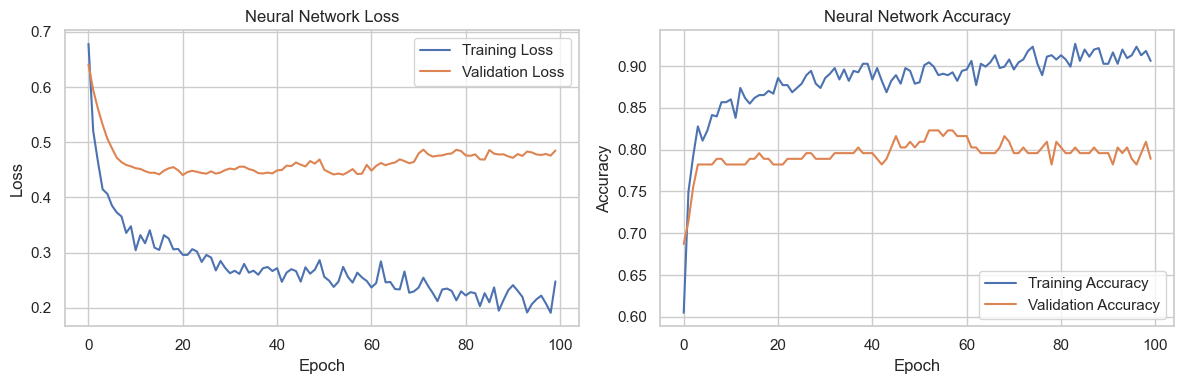

In [66]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
# Create and train other models
models = {
    'Neural Network': nn_model,
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance')
}

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Neural Network Accuracy: 0.5065


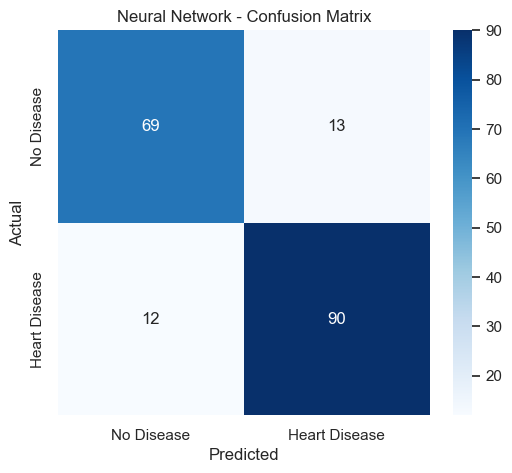


Training Random Forest...
Random Forest Accuracy: 0.8859


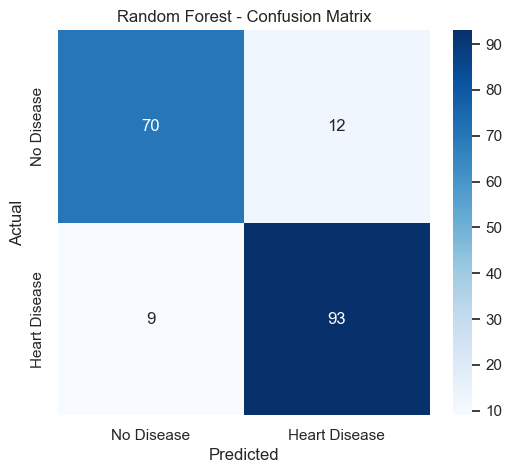


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8859


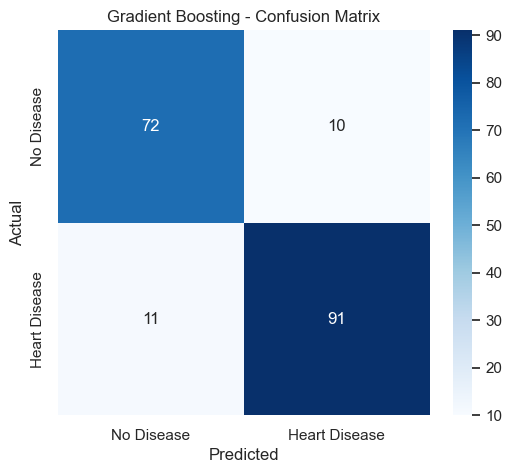


Training SVM...
SVM Accuracy: 0.8859


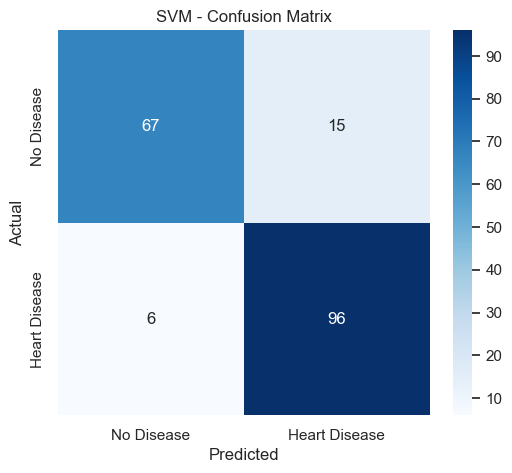


Training KNN...
KNN Accuracy: 0.8913


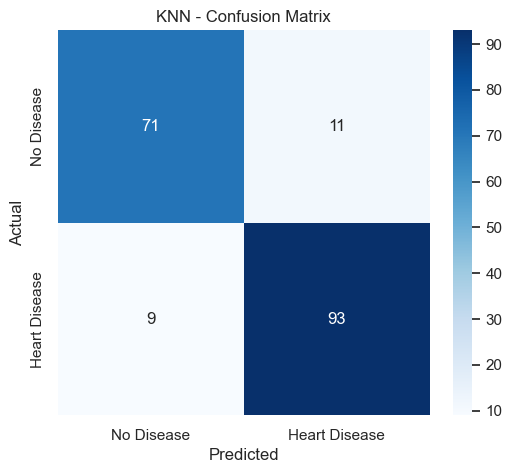

In [68]:
# Train and evaluate each model
results = {}

for name, model in models.items():
    if name != 'Neural Network':  # Neural Network already trained
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
    
    # Make predictions
    if name == 'Neural Network':
        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype(int)
    else:
        y_pred_classes = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_classes == y_test)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred_classes)
    sns.heatmap(cm, 
                annot=True, 
                fmt='d',
                cmap='Blues',
                xticklabels=['No Disease', 'Heart Disease'],
                yticklabels=['No Disease', 'Heart Disease'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

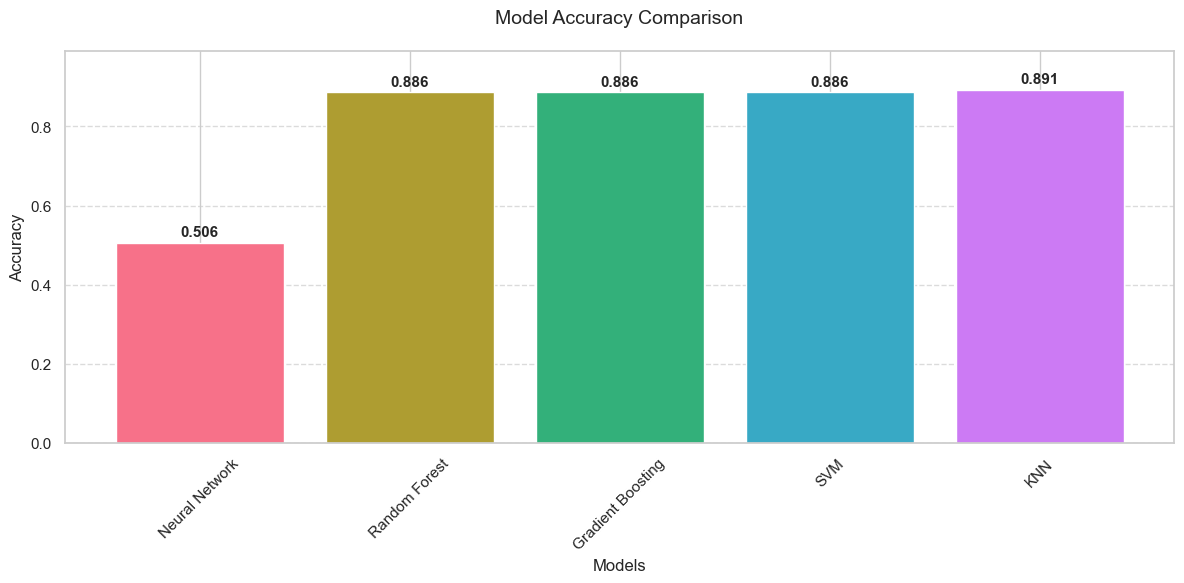

In [69]:
# Compare model accuracies
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(results))

# Create bar plot
bars = plt.bar(results.keys(), results.values(), color=colors)
plt.title('Model Accuracy Comparison', fontsize=14, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars with improved formatting
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height + 0.01,  # เพิ่มระยะห่างจากแท่ง
             f'{height:.3f}',  # แสดงทศนิยม 3 ตำแหน่ง
             ha='center', 
             va='bottom',
             fontsize=11,  # เพิ่มขนาดตัวอักษร
             fontweight='bold')  # ทำให้ตัวหนา

plt.ylim(0, max(results.values()) + 0.1)  # ปรับช่วงแกน y ให้มีพื้นที่แสดงค่า
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # เพิ่มเส้นกริด
plt.tight_layout()
plt.show()

In [70]:
# Find and save best model
best_model_name = max(results.items(), key=lambda x: x[1])[0]
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
# Save the best model
if best_model_name == 'Neural Network':
    best_model.save('../models/heart_disease_model.h5')
else:
    import joblib
    joblib.dump(best_model, '../models/heart_disease_model.pkl')

print(f"Best model saved successfully!")



Best performing model: KNN with accuracy 0.8913
Best model saved successfully!
